In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Load the data
df_arima = pd.read_csv('../ARIMA/outputs/test/Partition_horizon_50_train_small_weather/forecast_df.csv')
df_rnn = pd.read_csv('../RNN/results/weather_data/train_100_test_250_horizon_50_results.csv')
df_np = pd.read_csv('../NeuralProphet/outputs/test/Partition_horizon_50_train_small_weather/forecast_df.csv')
df_ll = pd.read_csv('../LagLlama/lag-llama/outputs/test/Partition_horizon_50_train_small_weather/forecast_df.csv')
df_tgpt = pd.read_csv('../TimeGPT/results/weather_data/train_100_test_250_horizon_50_weather_results.csv')

# Load training data
df_train = pd.read_csv('../data/weather/splits/train/train_small.csv')
df_test = pd.read_csv('../data/weather/splits/test/test_large_for_train_small.csv')


In [2]:
arima_forecast = df_arima['forecast_0'].dropna()
rnn_forecast = df_rnn[df_rnn['RollNumber'] == 1]['Predicted'].dropna()
np_forecast = df_np['forecast_0'].dropna()
ll_forecast = df_ll['forecast_0'].dropna()
tgpt_forecast = df_tgpt[df_tgpt['RollingOrigin'] == 0]['TimeGPT'].dropna()

# training data
true_y_train = df_train['Middeltemperatur']

# first 50
true_y_test = df_test['Middeltemperatur'].iloc[:50]

# combnine the two
true_y = pd.concat([true_y_train, true_y_test]).reset_index(drop=True)

# dates
dates = pd.to_datetime(df_ll['ds'].iloc[:50])
date_train = pd.to_datetime(df_train['DateTime'])
date_true = pd.concat([date_train, dates]).reset_index(drop=True)

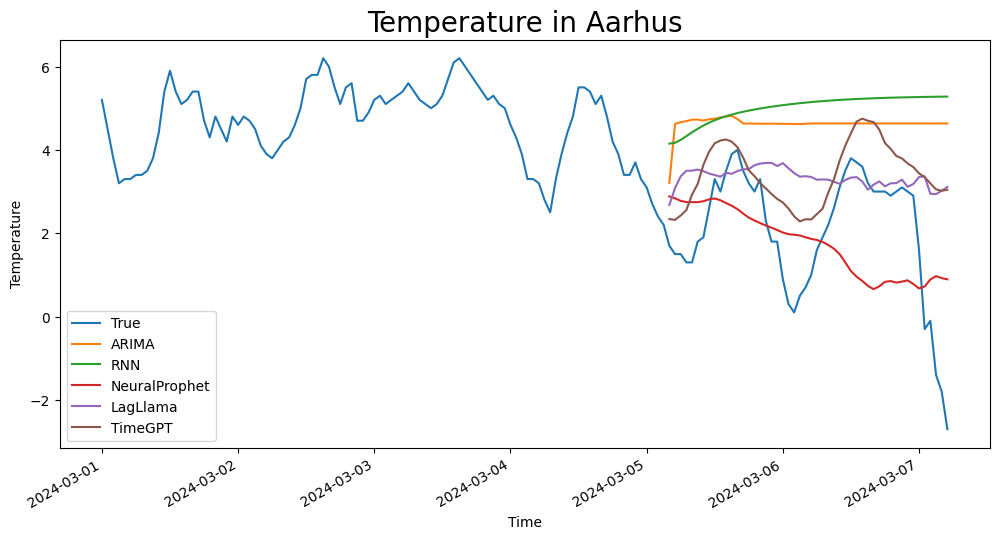

In [4]:
# plot the data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(date_true, true_y, label='True')
ax.plot(dates, arima_forecast, label='ARIMA')
ax.plot(dates, rnn_forecast, label='RNN')
ax.plot(dates, np_forecast, label='NeuralProphet')
ax.plot(dates, ll_forecast, label='LagLlama')
ax.plot(dates, tgpt_forecast, label='TimeGPT')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature in Aarhus', fontsize=20)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # rotates the x-axis labels to fit them better
plt.legend()
plt.savefig('forecast_comparison.png')
plt.show()